In [1]:
from hw4_utils import *
from astropy import units as u
from astropy.table import Table

In [2]:
df = get_gaia_two_body_orbit_cat(trimmed=False,show=True)

                solution_id            source_id nss_solution_type  \
0       4338096422163308546  5706079252076583424           Orbital   
1       4338096422163308546  5706082992989226496               SB1   
2       4338096422163308546  5706094984537873792               SB1   
3       4338096422163308546  5706107598860484480           Orbital   
4       4338096422163308546  5706124980589428992               SB1   
...                     ...                  ...               ...   
443200  4338096422163308546  5705985170814344192               SB1   
443201  4338096422163308546  5706002453762752896               SB1   
443202  4338096422163308546  5706017984363890432               SB1   
443203  4338096422163308546  5706076400218193280               SB1   
443204  4338096422163308546  5706078874120577536           Orbital   

                ra  ra_error        dec  dec_error  parallax  parallax_error  \
0       126.407959  0.064663 -21.782017   0.100705  1.179984        0.022529   

In [3]:
new_df = clean_catalog(df)
new_df

,ra,dec,parallax_error,pmra,pmra_error,pmdec,pmdec_error,a_thiele_innes,a_thiele_innes_error,b_thiele_innes,...,f_thiele_innes,f_thiele_innes_error,g_thiele_innes,g_thiele_innes_error,period,period_error,t_periastron,t_periastron_error,eccentricity,eccentricity_error
0,126.407959,-21.782017,0.022529,-0.928466,0.062391,4.918453,0.125346,0.122557,0.121251,0.416961,...,-0.590887,0.124647,-0.500694,0.096717,1176.674416,284.745270,217.520927,26.376719,0.504603,0.126088
1,127.245290,-21.383593,0.015209,-11.075071,0.015144,3.127896,0.015476,0.226884,0.022542,0.056534,...,0.080605,0.070825,-0.278658,0.023915,235.688931,1.534315,108.499002,10.661084,0.290296,0.124072
2,126.222140,-21.533409,0.015159,-1.388472,0.017775,3.242274,0.015359,-0.354954,0.039601,0.137856,...,-0.223271,0.064340,-0.192790,0.030628,645.666491,11.219227,-197.428958,18.218971,0.316612,0.059176
3,126.242389,-21.407242,0.054700,4.530252,0.204568,-11.288665,0.096852,-0.228289,1.450922,0.632927,...,-0.724363,0.383960,1.300229,1.105838,1038.764283,176.593980,-201.784481,283.947400,0.102369,0.104841
4,126.637937,-21.200423,0.021376,-5.045245,0.037055,2.545931,0.060872,-0.167582,0.079150,-0.357981,...,0.383679,0.056182,-0.038195,0.080172,862.123957,45.097595,-386.742636,33.546510,0.305632,0.129399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167243,131.925278,-18.398286,0.018271,-8.647208,0.062157,-0.788657,0.032906,0.536030,0.027554,-0.035510,...,0.056366,0.141567,-0.321972,0.047764,932.909229,69.522010,-417.290032,57.708603,0.215546,0.123545
167244,131.908910,-17.846152,0.042139,14.387005,0.044231,-4.247961,0.036724,0.605254,0.144850,-0.249293,...,-0.304323,0.320040,-0.625404,0.125710,461.183207,5.638895,139.950393,37.650856,0.115061,0.067990
167245,132.273121,-17.786332,0.026287,-5.061167,0.025359,3.906313,0.019845,-0.691323,0.032282,0.971519,...,-0.963483,0.051160,-0.722699,0.047046,586.148257,4.303703,5.846852,3.478559,0.481470,0.046187
167246,132.570002,-17.661639,0.020605,-7.288515,0.034663,5.475716,0.077518,0.428017,0.066691,0.056431,...,-0.358211,0.060159,0.030552,0.031027,842.442508,46.011723,356.324974,11.521924,0.580028,0.096646


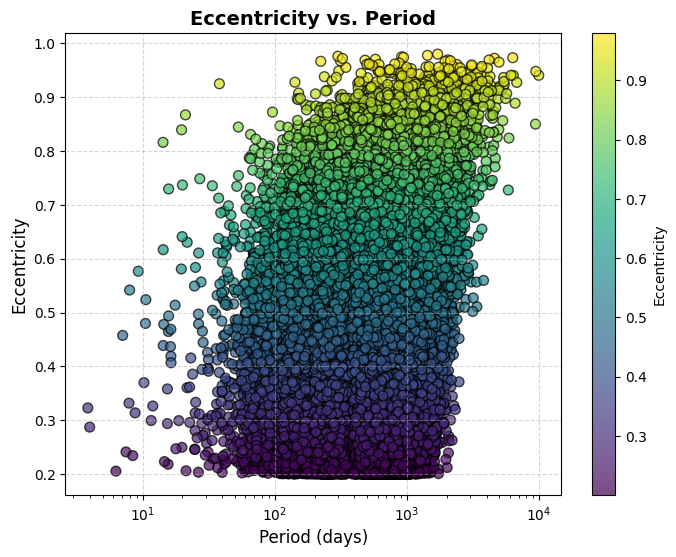

In [4]:
# Make a scatter plot of eccentricity vs. period

mask = new_df['eccentricity'] > 0.2

df1 = new_df[mask]

plt.figure(figsize=(8, 6))  # Adjust figure size
plt.scatter(df1['period'], df1['eccentricity'], 
            c=df1['eccentricity'], cmap='viridis',  # Color by period
            edgecolors='black', alpha=0.7, s=50)  # Add transparency & marker size

plt.colorbar(label='Eccentricity')  # Add color bar
plt.xlabel('Period (days)', fontsize=12)
plt.ylabel('Eccentricity', fontsize=12)
plt.xscale('log')  # Log scale for x-axis
plt.title('Eccentricity vs. Period', fontsize=14, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.5)  # Add a light grid
plt.show()

In [7]:
cat_fit = get_fit_params(new_df)

In [8]:
cat_fit

,ra,dec,parallax_error,pmra,pmra_error,pmdec,pmdec_error,a_thiele_innes,a_thiele_innes_error,b_thiele_innes,...,period,period_error,t_periastron,t_periastron_error,eccentricity,eccentricity_error,a0_fit,omega_fit_deg,Omega_fit_deg,i_fit_deg
0,126.407959,-21.782017,0.022529,-0.928466,0.062391,4.918453,0.125346,0.122557,0.121251,0.416961,...,1176.674416,284.745270,217.520927,26.376719,0.504603,0.126088,0.861758,63.079081,47.486597,75.573745
1,127.245290,-21.383593,0.015209,-11.075071,0.015144,3.127896,0.015476,0.226884,0.022542,0.056534,...,235.688931,1.534315,108.499002,10.661084,0.290296,0.124072,0.261906,1.833935,17.011434,179.999971
2,126.222140,-21.533409,0.015159,-1.388472,0.017775,3.242274,0.015359,-0.354954,0.039601,0.137856,...,645.666491,11.219227,-197.428958,18.218971,0.316612,0.059176,0.419680,149.413249,-2.810066,55.717339
3,126.242389,-21.407242,0.054700,4.530252,0.204568,-11.288665,0.096852,-0.228289,1.450922,0.632927,...,1038.764283,176.593980,-201.784481,283.947400,0.102369,0.104841,0.864768,34.816777,16.882725,-0.000020
4,126.637937,-21.200423,0.021376,-5.045245,0.037055,2.545931,0.060872,-0.167582,0.079150,-0.357981,...,862.123957,45.097595,-386.742636,33.546510,0.305632,0.129399,-0.450796,42.863436,31.629603,44.978225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167243,131.925278,-18.398286,0.018271,-8.647208,0.062157,-0.788657,0.032906,0.536030,0.027554,-0.035510,...,932.909229,69.522010,-417.290032,57.708603,0.215546,0.123545,0.429128,57.867385,59.259798,179.999966
167244,131.908910,-17.846152,0.042139,14.387005,0.044231,-4.247961,0.036724,0.605254,0.144850,-0.249293,...,461.183207,5.638895,139.950393,37.650856,0.115061,0.067990,0.704025,67.166241,42.945474,156.456964
167245,132.273121,-17.786332,0.026287,-5.061167,0.025359,3.906313,0.019845,-0.691323,0.032282,0.971519,...,586.148257,4.303703,5.846852,3.478559,0.481470,0.046187,1.214494,55.895559,70.262281,13.261892
167246,132.570002,-17.661639,0.020605,-7.288515,0.034663,5.475716,0.077518,0.428017,0.066691,0.056431,...,842.442508,46.011723,356.324974,11.521924,0.580028,0.096646,0.558641,39.664127,2.456066,83.876316


In [9]:
cat_fit.to_csv('hw4_cat_fit.csv', index=False)